# Load Data

In [1]:
dt = 1/60 # fps
delay = 0.083 # s
T = 50  # frames selected for STA

In [2]:

import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import HTMLWriter
from matplotlib.animation import FuncAnimation
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import convolve
from matplotlib.animation import HTMLWriter
from matplotlib.animation import FuncAnimation
import matplotlib.gridspec as gridspec
from scipy.interpolate import griddata
import pickle
import stimgenerate as sg
import matplotlib.patches as mpatches
import pandas as pd
import scipy.stats as stats
from scipy.integrate import simpson
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import mark_inset


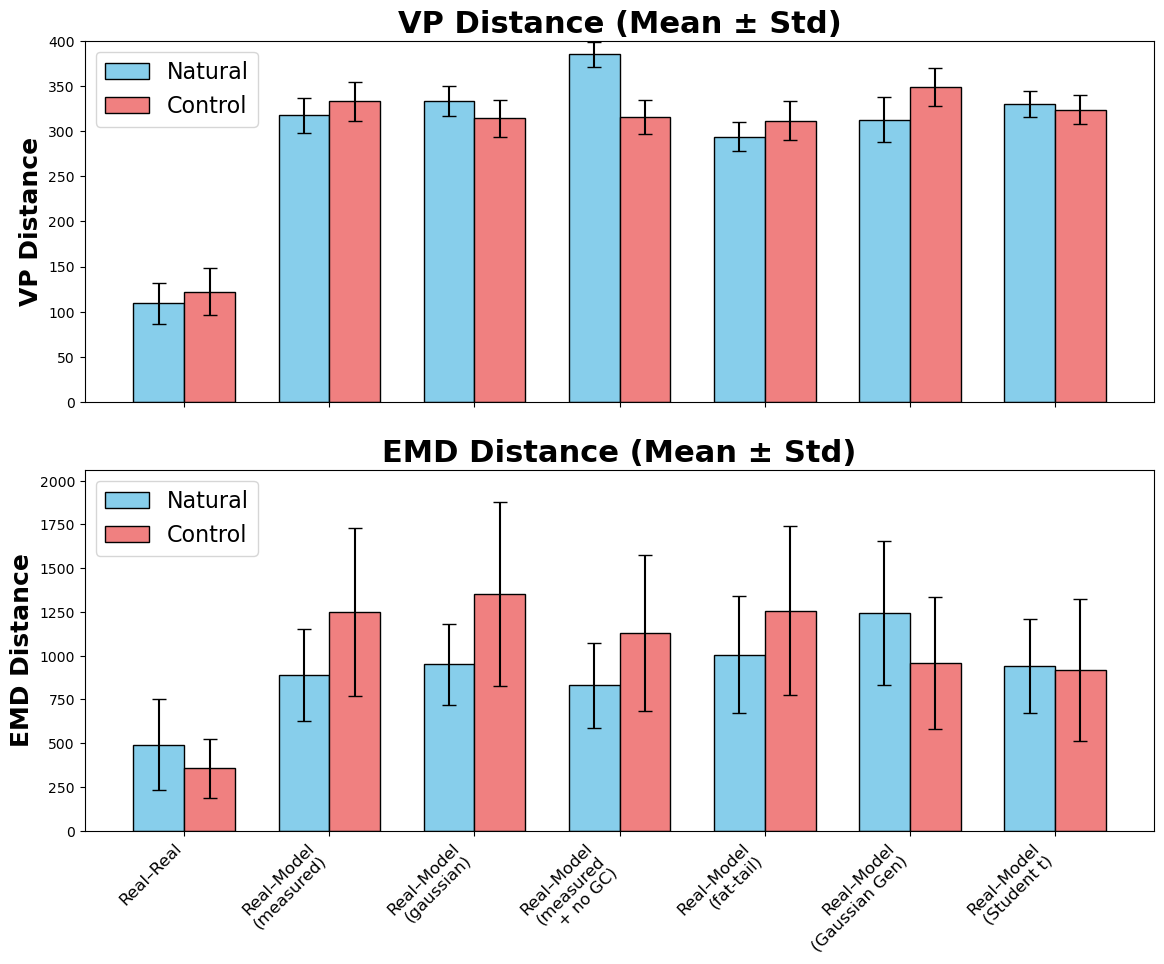

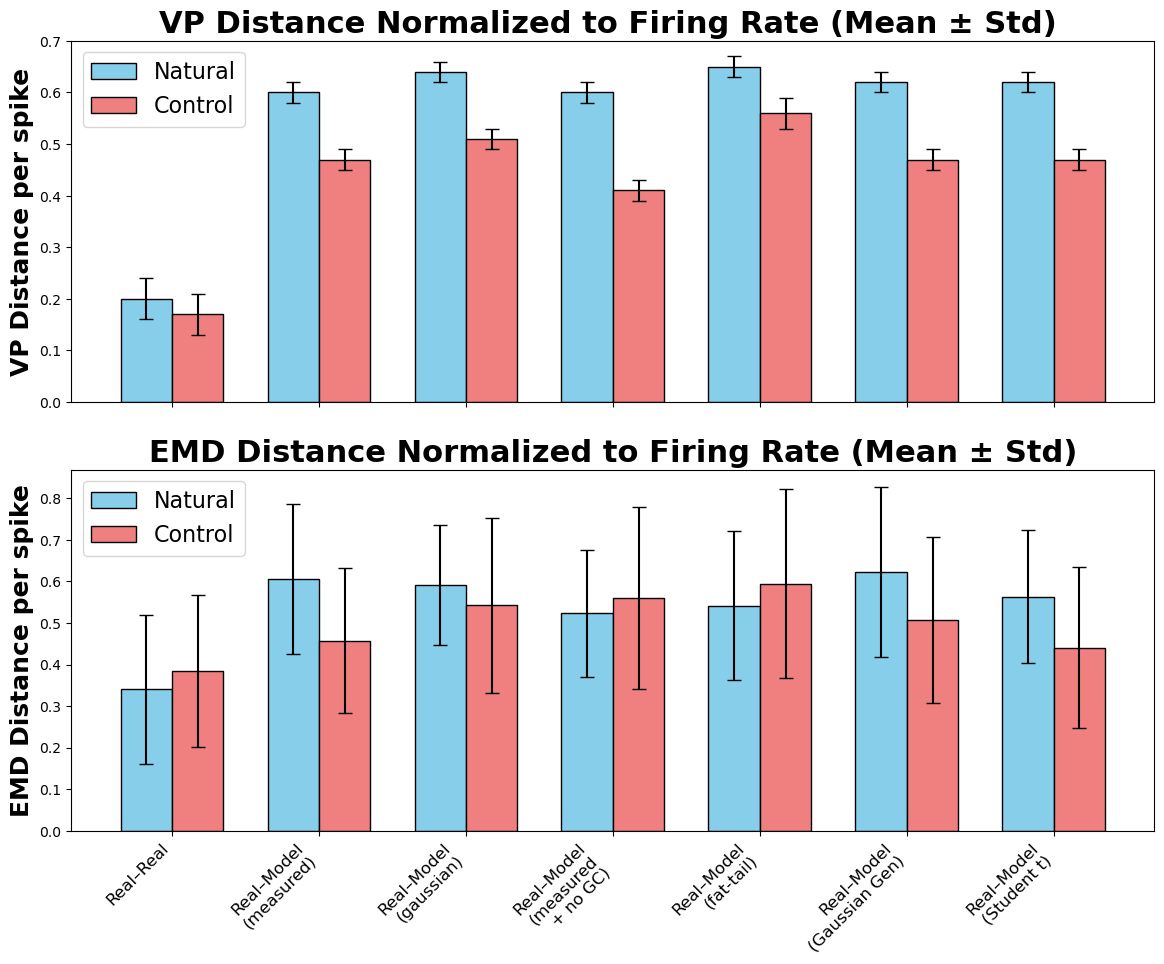

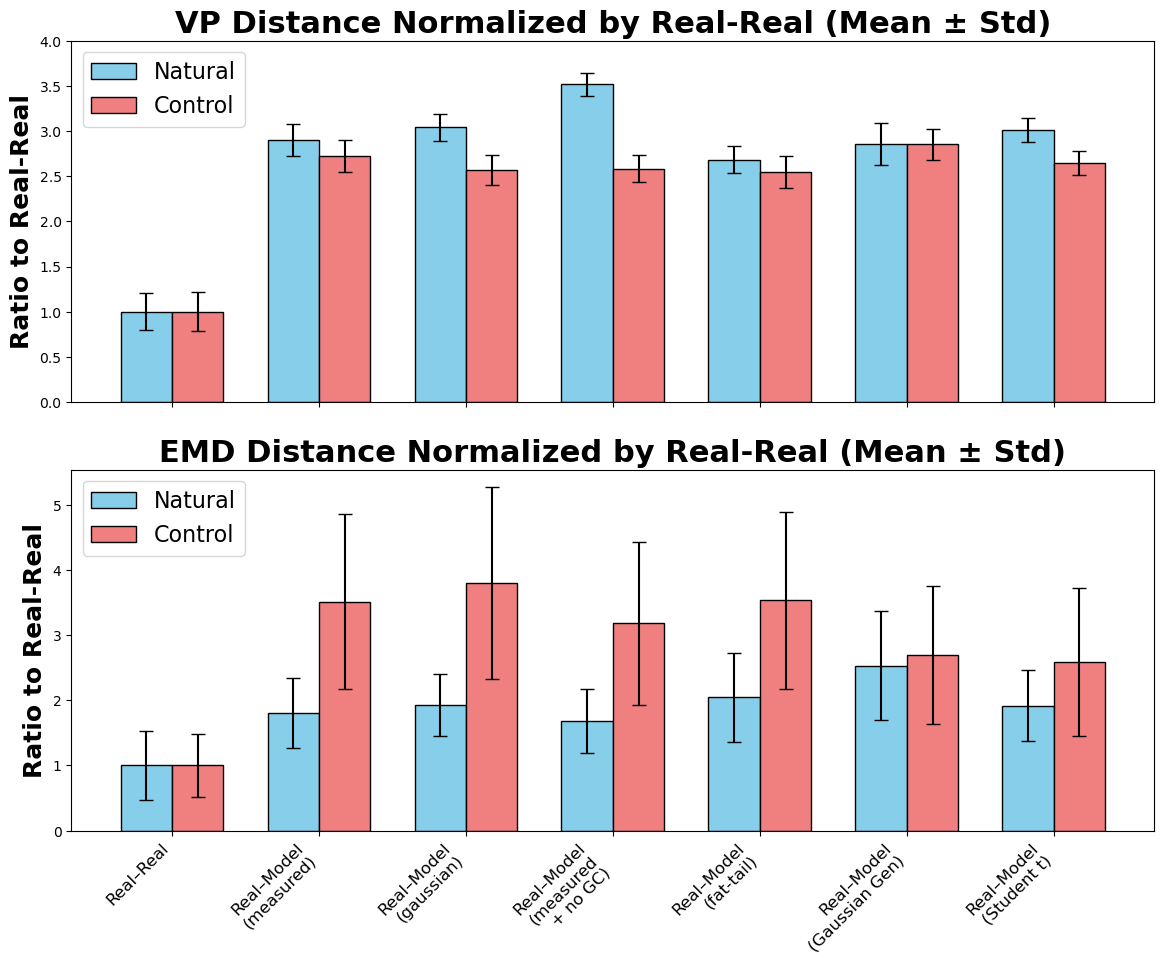

In [3]:

RRvp_nat   = [109.46, 143.89, 22.75, 0.21]
RMmvp_nat  = [317.58,105.26,19.55,0.06]
RMgvp_nat  = [333.14,89.93,16.44,0.05]
RMnvp_nat  = [385.08,69.83,13.81,0.04]
RMfvp_nat  = [293.77,100.16,16.13,0.05]
RMGenvp_nat  = [312.82,158.16,25.13,0.20]
RMtvp_nat  = [329.92,84.68,14.13,0.04]

RRvp_nat_norm=[0.20,0.26,0.04,0.21]
RMmvp_nat_norm=[0.60,0.16,0.02,0.04]
RMgvp_nat_norm=[0.64,0.14,0.02,0.04]
RMnvp_nat_norm=[0.60,0.11,0.02,0.03]
RMfvp_nat_norm=[0.65,0.14,0.02,0.04]
RMGenvp_nat_norm=[0.62,0.14,0.02,0.04]
RMtvp_nat_norm=[0.62,0.11,0.02,0.04]

RRemd_nat   = [491.71, 1446.29, 258.20, 0.53]
RMmemd_nat  = [889.11,1465.88,264.54,0.30]
RMgemd_nat  = [950.39,1607.85,232.79,0.24]
RMnemd_nat  = [830.08,1587.31,242.12,0.29]
RMfemd_nat  = [1005.34,1855.84,333.29,0.33]
RMGenvmd_nat  = [1244.18,1997.51,410.01,0.33]
RMtmd_nat  = [941.80,1672.18,268,0.28]
# Control condition
RRvp_ctrl   = [122.26,159.15,26.31,0.22]
RMmvp_ctrl  = [332.97,139.16,21.29,0.06]
RMgvp_ctrl  = [314.08,129.15,20.44,0.07]
RMnvp_ctrl  = [315.67,102.24,18.44,0.06]
RMfvp_ctrl  = [311.55,126.35,21.83,0.07]
RMGenvp_ctrl  = [348.82,121.16,21.13,0.6]
RMtvp_ctrl  = [323.92,102.16,16.13,0.05]

RRvp_ctrl_norm =[0.17,0.22,0.04,0.21]
RMmvp_ctrl_norm=[0.47,0.13,0.02,0.05]
RMgvp_ctrl_norm=[0.51,0.14,0.02,0.05]
RMnvp_ctrl_norm=[0.41,0.11,0.02,0.04]
RMfvp_ctrl_norm=[0.56,0.16,0.03,0.05]
RMGenvp_ctrl_norm=[0.47,0.10,0.02,0.03]
RMtvp_ctrl_norm=[0.47,0.11,0.02,0.04]

RRemd_ctrl   = [355.39 ,926.07 ,169.80,0.48]
RMmemd_ctrl  = [1248.94,2731.68,478.6 ,0.38]
RMgemd_ctrl  = [1351.22,2491.42,524.87,0.39]
RMnemd_ctrl  = [1130.31,2018.41,444.12,0.39]
RMfemd_ctrl  = [1256.79,2112.71,482.05,0.38]
RMGenvmd_ctrl  = [955.80,1882.18,376.72,0.38]
RMtmd_ctrl  = [917.80,2082.18,403.72,0.44]
# Convert to arrays
dataVP_nat  = np.array([RRvp_nat, RMmvp_nat, RMgvp_nat, RMnvp_nat, RMfvp_nat,RMGenvp_nat,RMtvp_nat])
dataVP_ctrl = np.array([RRvp_ctrl, RMmvp_ctrl, RMgvp_ctrl, RMnvp_ctrl, RMfvp_ctrl,RMGenvp_ctrl,RMtvp_ctrl])
dataVP_nat_norm = np.array([RRvp_nat_norm, RMmvp_nat_norm, RMgvp_nat_norm, RMnvp_nat_norm, RMfvp_nat_norm,RMGenvp_nat_norm,RMtvp_nat_norm])
dataVP_ctrl_norm = np.array([RRvp_ctrl_norm, RMmvp_ctrl_norm, RMgvp_ctrl_norm, RMnvp_ctrl_norm, RMfvp_ctrl_norm,RMGenvp_ctrl_norm,RMtvp_ctrl_norm])
dataEMD_nat  = np.array([RRemd_nat, RMmemd_nat, RMgemd_nat, RMnemd_nat, RMfemd_nat,RMGenvmd_nat,RMtmd_nat])
dataEMD_ctrl = np.array([RRemd_ctrl, RMmemd_ctrl, RMgemd_ctrl, RMnemd_ctrl, RMfemd_ctrl,RMGenvmd_ctrl,RMtmd_ctrl])

labels = [
    'Real–Real', 
    'Real–Model\n(measured)', 
    'Real–Model\n(gaussian)', 
    'Real–Model\n(measured\n+ no GC)',
    'Real–Model\n(fat-tail)', 
    'Real–Model\n(Gaussian Gen)',
    'Real–Model\n(Student t)',
]
x = np.arange(len(labels))
width = 0.35

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# --- VP Distance grouped bar chart ---
ax = axes[0]
means_vp_nat  = dataVP_nat[:, 0].astype(float)
stds_vp_nat   = dataVP_nat[:, 2].astype(float)
means_vp_ctrl = dataVP_ctrl[:, 0].astype(float)
stds_vp_ctrl  = dataVP_ctrl[:, 2].astype(float)

ax.bar(x - width/2, means_vp_nat, width,
       yerr=stds_vp_nat, capsize=5,
       facecolor='skyblue', edgecolor='black',
       label='Natural')
ax.bar(x + width/2, means_vp_ctrl, width,
       yerr=stds_vp_ctrl, capsize=5,
       facecolor='lightcoral', edgecolor='black',
       label='Control')

ax.set_ylabel('VP Distance', fontsize=18, fontweight='bold')
ax.set_title('VP Distance (Mean ± Std)', fontsize=22, fontweight='bold')
ax.set_ylim(0, 400)
ax.legend(loc='upper left', fontsize=16)

# --- EMD Distance grouped bar chart ---
ax = axes[1]
means_emd_nat  = dataEMD_nat[:, 0].astype(float)
stds_emd_nat   = dataEMD_nat[:, 2].astype(float)
means_emd_ctrl = dataEMD_ctrl[:, 0].astype(float)
stds_emd_ctrl  = dataEMD_ctrl[:, 2].astype(float)

ax.bar(x - width/2, means_emd_nat, width,
       yerr=stds_emd_nat, capsize=5,
       facecolor='skyblue', edgecolor='black',
       label='Natural')
ax.bar(x + width/2, means_emd_ctrl, width,
       yerr=stds_emd_ctrl, capsize=5,
       facecolor='lightcoral', edgecolor='black',
       label='Control')

# common y-limit
ymax = max(
    np.max(means_emd_nat + stds_emd_nat),
    np.max(means_emd_ctrl + stds_emd_ctrl)
) * 1.1
ax.set_ylim(0, ymax)


ax.set_ylabel('EMD Distance', fontsize=18, fontweight='bold')
ax.set_title('EMD Distance (Mean ± Std)', fontsize=22, fontweight='bold')
ax.legend(loc='upper left', fontsize=16)

# set shared xticks on bottom subplot
axes[1].set_xticks(x)
axes[1].set_xticklabels(labels, rotation=45, ha='right', fontsize=12)

plt.tight_layout(pad=2.0)
plt.show()

# Additional plotting code for LNmodel.ipynb
# Add this code after the existing VP and EMD distance plots

# Create Real-Real normalized data (divide everything by Real-Real values)
dataVP_nat_rrnorm = dataVP_nat / dataVP_nat[0, 0]  # Normalize by Real-Real VP distance
dataVP_ctrl_rrnorm = dataVP_ctrl / dataVP_ctrl[0, 0]  # Normalize by Real-Real VP distance
dataEMD_nat_rrnorm = dataEMD_nat / dataEMD_nat[0, 0]  # Normalize by Real-Real EMD distance
dataEMD_ctrl_rrnorm = dataEMD_ctrl / dataEMD_ctrl[0, 0]  # Normalize by Real-Real EMD distance

# --- NEW FIGURE 1: Firing Rate Normalized Data ---
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# --- VP Distance Normalized to Firing Rate ---
ax = axes[0]
means_vp_nat_norm  = dataVP_nat_norm[:, 0].astype(float)
stds_vp_nat_norm   = dataVP_nat_norm[:, 2].astype(float)
means_vp_ctrl_norm = dataVP_ctrl_norm[:, 0].astype(float)
stds_vp_ctrl_norm  = dataVP_ctrl_norm[:, 2].astype(float)

ax.bar(x - width/2, means_vp_nat_norm, width,
       yerr=stds_vp_nat_norm, capsize=5,
       facecolor='skyblue', edgecolor='black',
       label='Natural')
ax.bar(x + width/2, means_vp_ctrl_norm, width,
       yerr=stds_vp_ctrl_norm, capsize=5,
       facecolor='lightcoral', edgecolor='black',
       label='Control')

ax.set_ylabel('VP Distance per spike', fontsize=18, fontweight='bold')
ax.set_title('VP Distance Normalized to Firing Rate (Mean ± Std) ', fontsize=22, fontweight='bold')
ax.set_ylim(0, 0.7)
ax.legend(loc='upper left', fontsize=16)

# --- EMD Distance Normalized to Firing Rate ---
ax = axes[1]
# For EMD, we need to create normalized versions since we don't have them in the original data
# We'll use the same normalization approach as VP
emd_nat_norm = dataEMD_nat[:, 0] / dataEMD_nat[:, 1]  # Divide by firing rate (2nd column)
emd_ctrl_norm = dataEMD_ctrl[:, 0] / dataEMD_ctrl[:, 1]  # Divide by firing rate (2nd column)
emd_nat_norm_std = dataEMD_nat[:, 2] / dataEMD_nat[:, 1]  # Normalize std by firing rate
emd_ctrl_norm_std = dataEMD_ctrl[:, 2] / dataEMD_ctrl[:, 1]  # Normalize std by firing rate

ax.bar(x - width/2, emd_nat_norm, width,
       yerr=emd_nat_norm_std, capsize=5,
       facecolor='skyblue', edgecolor='black',
       label='Natural')
ax.bar(x + width/2, emd_ctrl_norm, width,
       yerr=emd_ctrl_norm_std, capsize=5,
       facecolor='lightcoral', edgecolor='black',
       label='Control')

ax.set_ylabel('EMD Distance per spike', fontsize=18, fontweight='bold')
ax.set_title('EMD Distance Normalized to Firing Rate (Mean ± Std)', fontsize=22, fontweight='bold')
ax.legend(loc='upper left', fontsize=16)

# set shared xticks on bottom subplot
axes[1].set_xticks(x)
axes[1].set_xticklabels(labels, rotation=45, ha='right', fontsize=12)

plt.tight_layout(pad=2.0)
plt.show()

# --- NEW FIGURE 2: Real-Real Normalized Data ---
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# --- VP Distance Normalized by Real-Real ---
ax = axes[0]
means_vp_nat_rrnorm  = dataVP_nat_rrnorm[:, 0].astype(float)
stds_vp_nat_rrnorm   = dataVP_nat_rrnorm[:, 2].astype(float)
means_vp_ctrl_rrnorm = dataVP_ctrl_rrnorm[:, 0].astype(float)
stds_vp_ctrl_rrnorm  = dataVP_ctrl_rrnorm[:, 2].astype(float)

ax.bar(x - width/2, means_vp_nat_rrnorm, width,
       yerr=stds_vp_nat_rrnorm, capsize=5,
       facecolor='skyblue', edgecolor='black',
       label='Natural')
ax.bar(x + width/2, means_vp_ctrl_rrnorm, width,
       yerr=stds_vp_ctrl_rrnorm, capsize=5,
       facecolor='lightcoral', edgecolor='black',
       label='Control')

ax.set_ylabel('Ratio to Real-Real', fontsize=18, fontweight='bold')
ax.set_title('VP Distance Normalized by Real-Real (Mean ± Std)', fontsize=22, fontweight='bold')
ax.set_ylim(0, 4)
ax.legend(loc='upper left', fontsize=16)

# --- EMD Distance Normalized by Real-Real ---
ax = axes[1]
means_emd_nat_rrnorm  = dataEMD_nat_rrnorm[:, 0].astype(float)
stds_emd_nat_rrnorm   = dataEMD_nat_rrnorm[:, 2].astype(float)
means_emd_ctrl_rrnorm = dataEMD_ctrl_rrnorm[:, 0].astype(float)
stds_emd_ctrl_rrnorm  = dataEMD_ctrl_rrnorm[:, 2].astype(float)

ax.bar(x - width/2, means_emd_nat_rrnorm, width,
       yerr=stds_emd_nat_rrnorm, capsize=5,
       facecolor='skyblue', edgecolor='black',
       label='Natural')
ax.bar(x + width/2, means_emd_ctrl_rrnorm, width,
       yerr=stds_emd_ctrl_rrnorm, capsize=5,
       facecolor='lightcoral', edgecolor='black',
       label='Control')

ax.set_ylabel('Ratio to Real-Real', fontsize=18, fontweight='bold')
ax.set_title('EMD Distance Normalized by Real-Real (Mean ± Std)', fontsize=22, fontweight='bold')
ax.legend(loc='upper left', fontsize=16)

# set shared xticks on bottom subplot
axes[1].set_xticks(x)
axes[1].set_xticklabels(labels, rotation=45, ha='right', fontsize=12)

plt.tight_layout(pad=2.0)
plt.show()
